In [1]:
import pandas as pd
import numpy as np 
import plotnine as p9
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Part One: Data Exploration

### 1. Read in the dataset and display summaries regarding it

In [2]:
health_data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")

In [3]:
health_data.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [4]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


In [5]:
health_data.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


Looking at this dataset that are a few probelms that will need to be adressed before doing anything else.
For starters we can tell that the gender variable is a dummy variable that can be represented by True or False,
Regions can be turned into a categorical variable, and smokes can also be a dummy variable 

### 2. Fixing Concerns wih the dataset 

In [6]:
Clean_Health_Data = pd.get_dummies(health_data)

### 3. Making plots comparing repsonse variable to the various previctor variables 

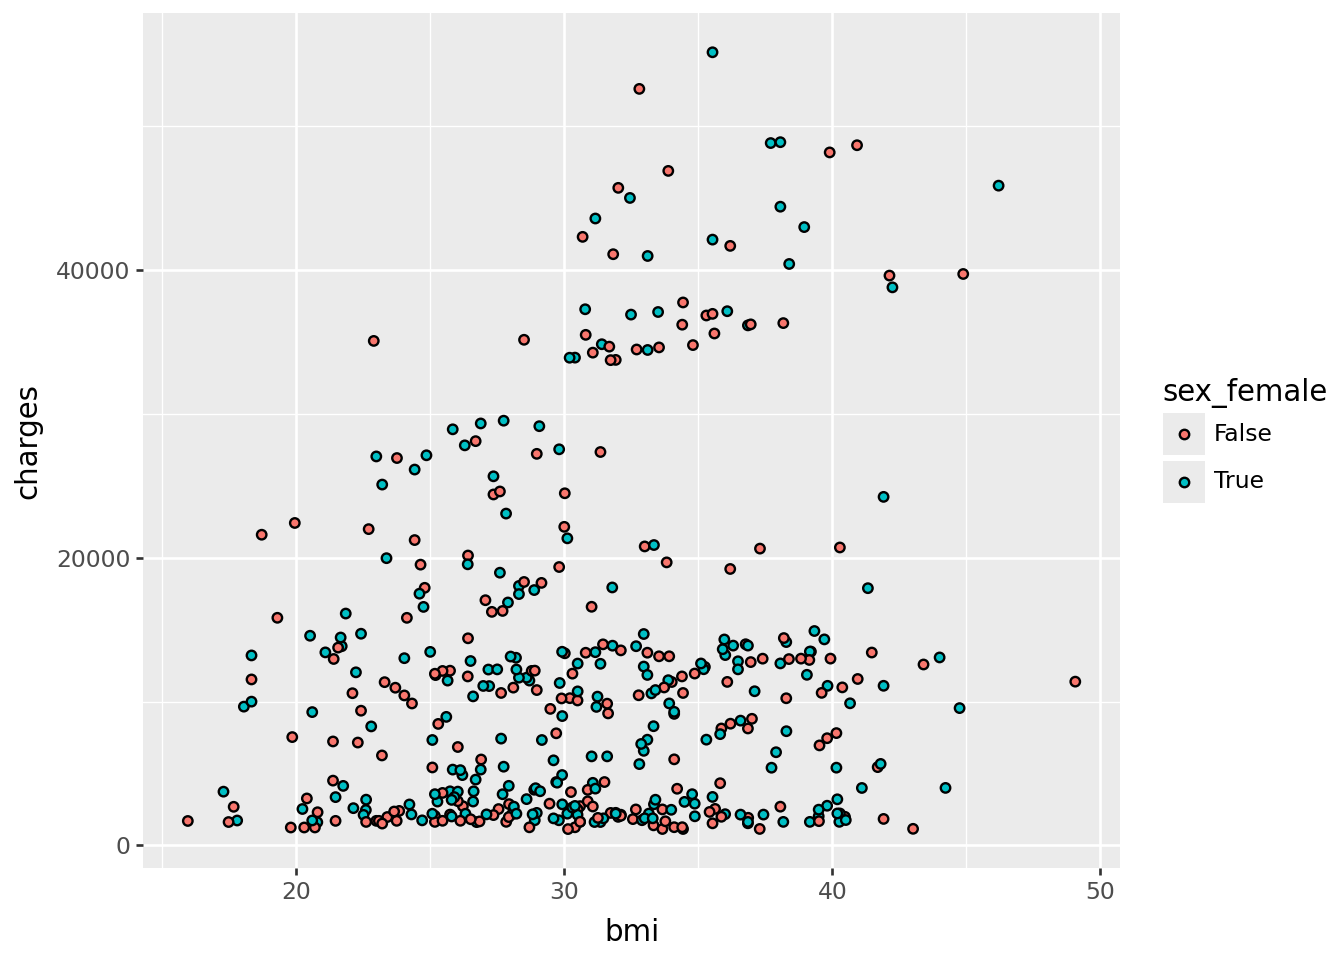

In [7]:
(p9.ggplot(Clean_Health_Data, p9.aes(x = "bmi", y = "charges", fill = "sex_female"))
+p9.geom_point()
)

Based on this first graph we can observe that their isnt much of a difference between male and females as are as the distribution of etheir charages or bmi, having simmlar results for each. We can see that the overall shape of this chart indicates that as bmi increases, charges will also increase at an exponential rate, however fitting a line to the plot would be difficult due to the uneaveness of the distribution. 

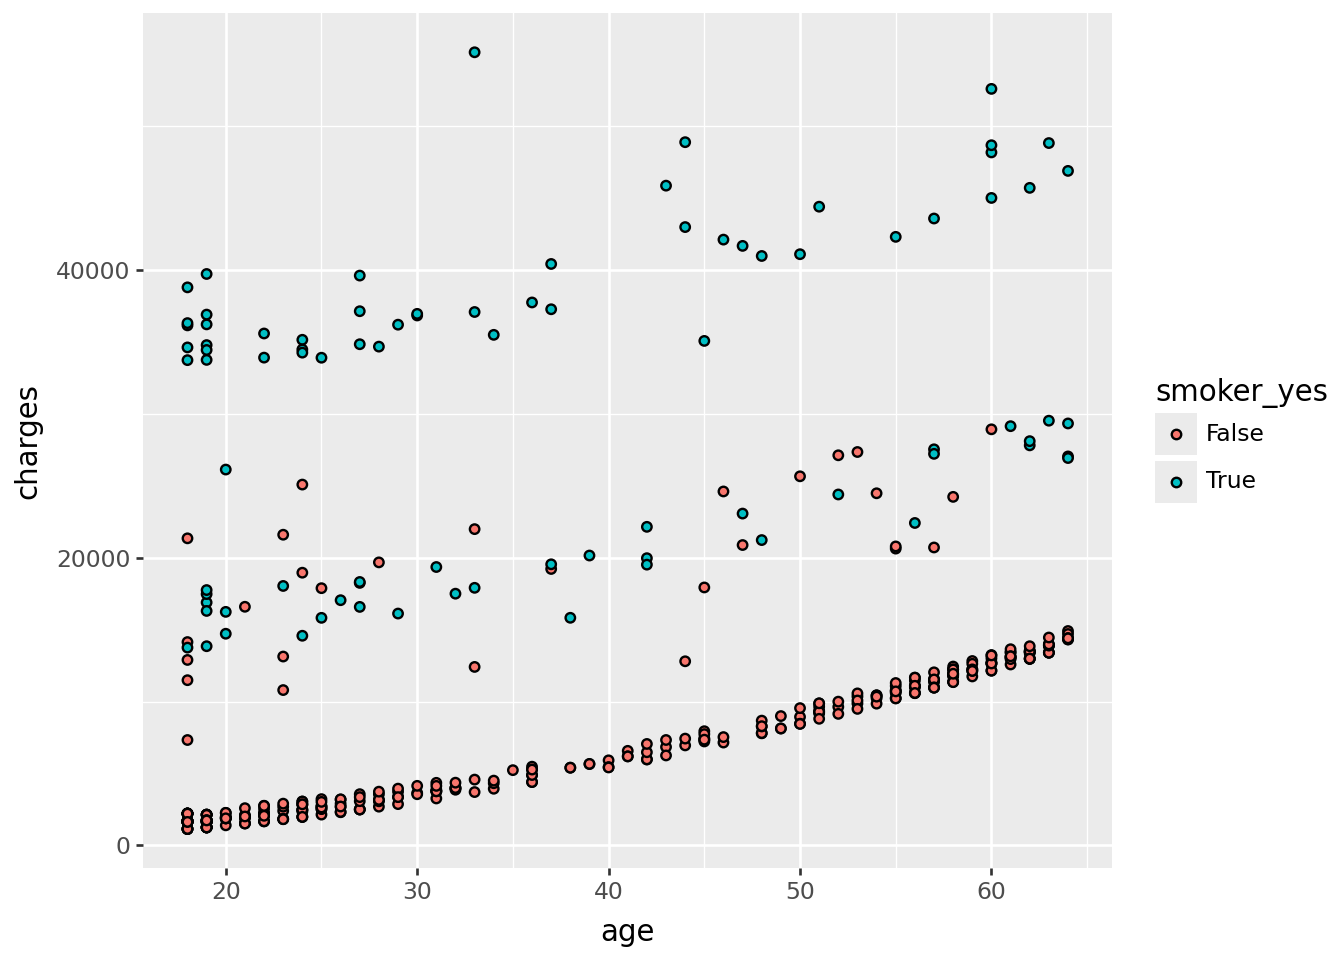

In [8]:
(p9.ggplot(Clean_Health_Data, p9.aes(x = "age", y = "charges", fill = "smoker_yes"))

+p9.geom_point()
)

This second graph does a good job at illustrating how chrages will increase as you get older, at first i viewed this data without categorizing it by smoking and i could see the three different tiers of charges. We'll see that the different tier of charges can be assosiated based on if you smoke or not with the people who smoke having a very high charges in the top tier of charges. 

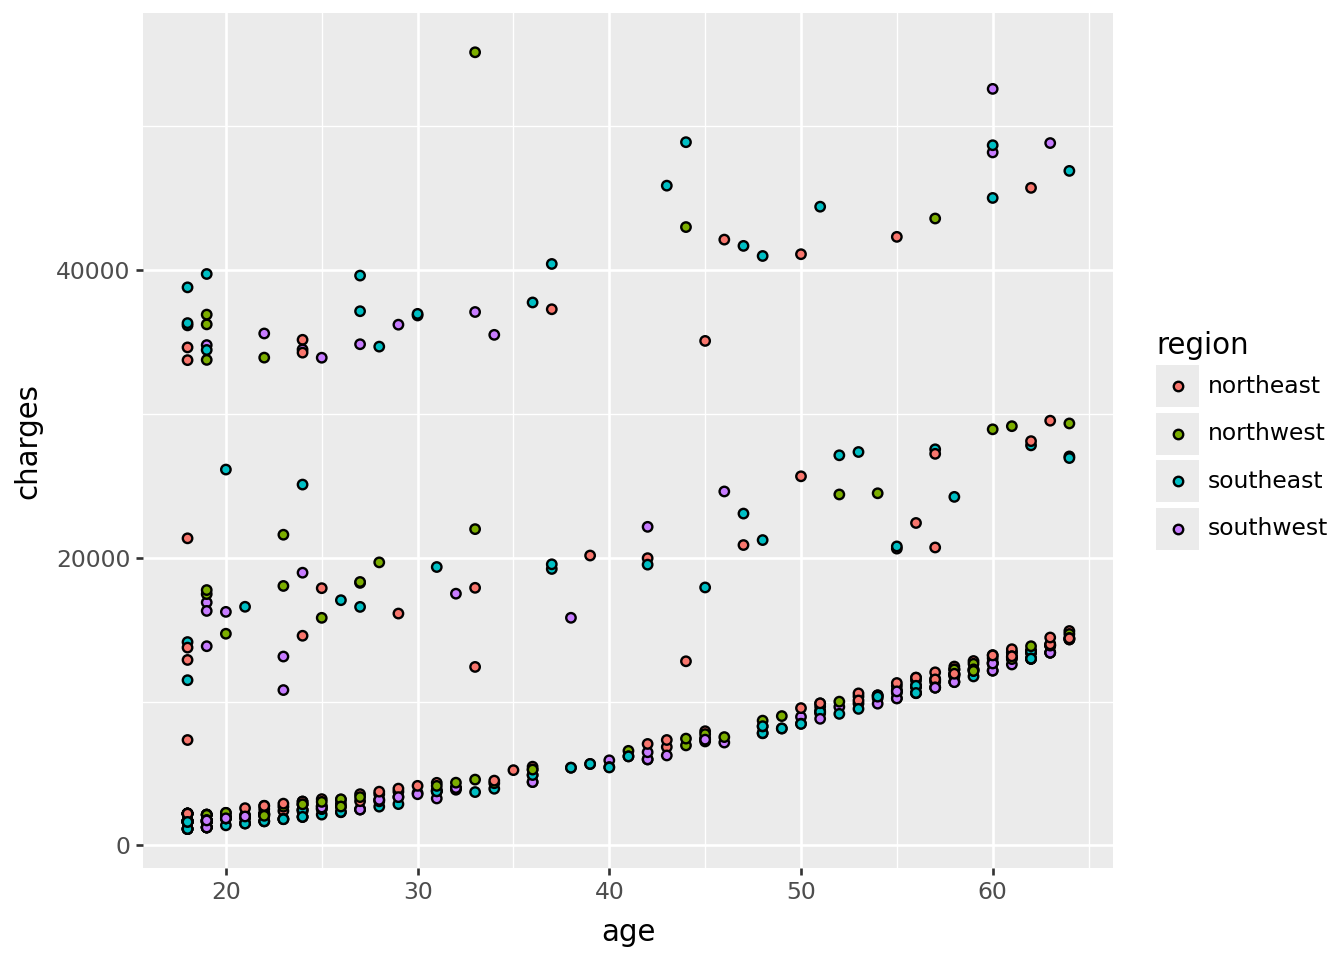

In [9]:
(p9.ggplot(health_data, p9.aes(x="age", y = "charges", fill = "region"))

+p9.geom_point())

Using a simmilar graph as the previous one we still observe the 3 tiers, and looking at the different regions we can see that their effects on charges are equal and dont equate to much explanitory value, this variable will most likely not be needed for the interpretation of our data in the remaining models. 

Based on these 3 plots we can infer that smoking is going to most likely have the most explanitory vaule for the response variable of charges.

## Part Two: Simple Linear Models

### 1. Constructing a simple linear regression model for charges versus age

   age      charges     Pred_Base
0   19  16884.92400   7958.940737
1   33  21984.47061  11162.127428
2   32   3866.85520  10933.328378
3   31   3756.62160  10704.529329
4   60  28923.13692  17339.701761


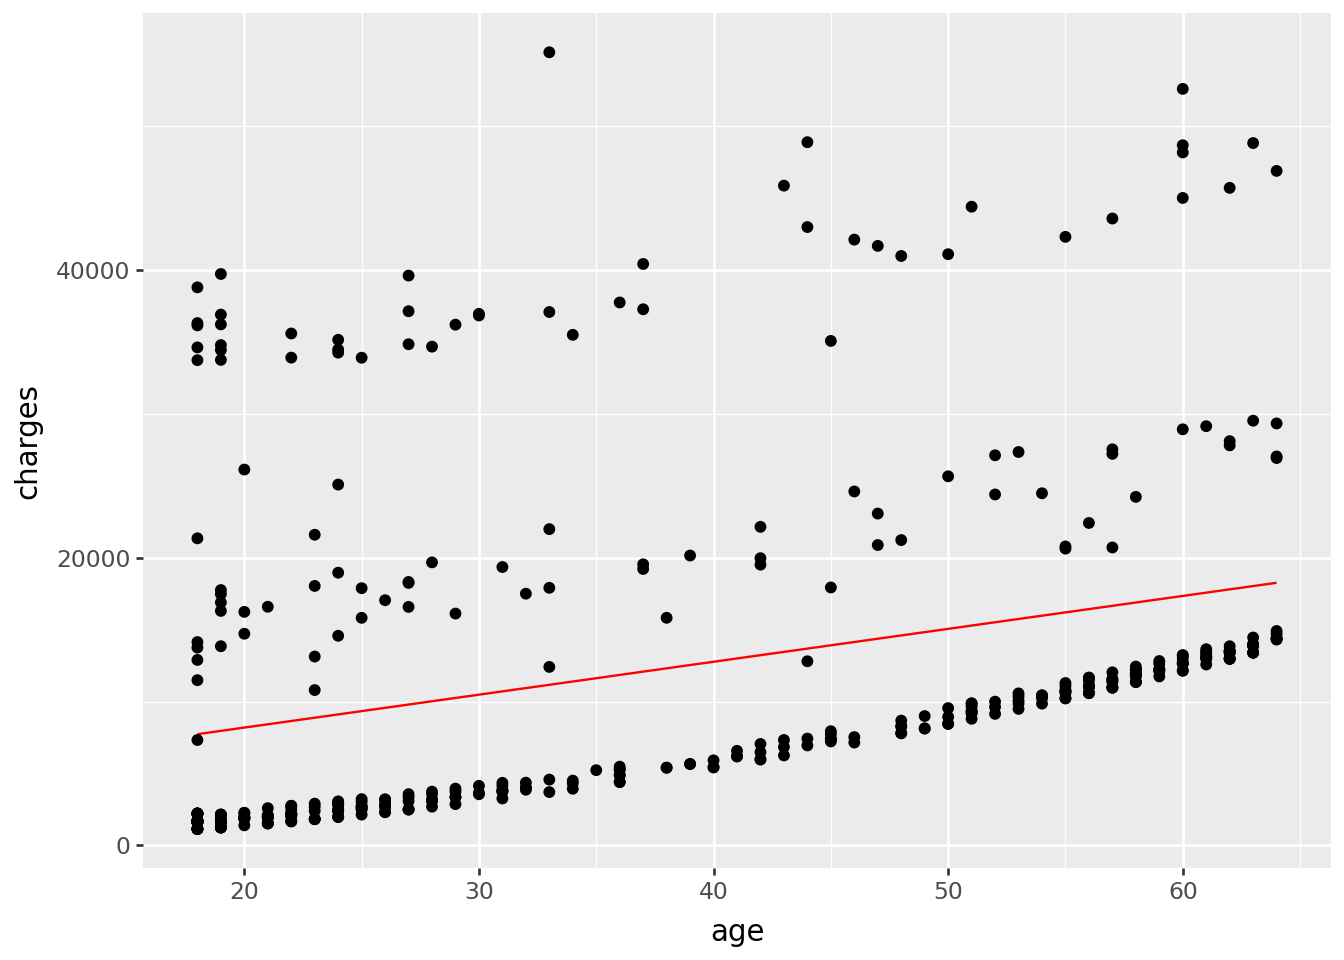

In [10]:
x2_1 = Clean_Health_Data[["age"]]
y2_1 = Clean_Health_Data["charges"]

base_age_model = LinearRegression().fit(x2_1, y2_1)
Clean_Health_Data["Pred_Base"] = base_age_model.predict(x2_1)

MSE_base = mean_squared_error(y2_1, base_age_model.predict(x2_1))
R_base = r2_score(y2_1, base_age_model.predict(x2_1))

print(Clean_Health_Data[["age", "charges", "Pred_Base"]].head())

(p9.ggplot(Clean_Health_Data, p9.aes(
    x = "age", 
    y = "charges"
)) 
+p9.geom_line(Clean_Health_Data, p9.aes("age", "Pred_Base"), color = "red")
+p9.geom_point()
)

Using our model we can observe that the predicting attempted to best fit with the first tier of charges and got pretty close, however the points above with higher charges pulled our prediction values higher. Looking at the first 5 rows of data we can see that their is a big difference between the predicted charge versus the actual charge and we will need to change the model to help create better fitting predictions. 

### 2. Adding a model that includes the sex variable

     age  sex_female    charges     pred_Sex
40    18       False  1705.6245  8076.830459
54    18       False  1694.7964  8076.830459
59    18       False  1137.4697  8076.830459
93    18       False  1704.5681  8076.830459
144   18       False  1149.3959  8076.830459


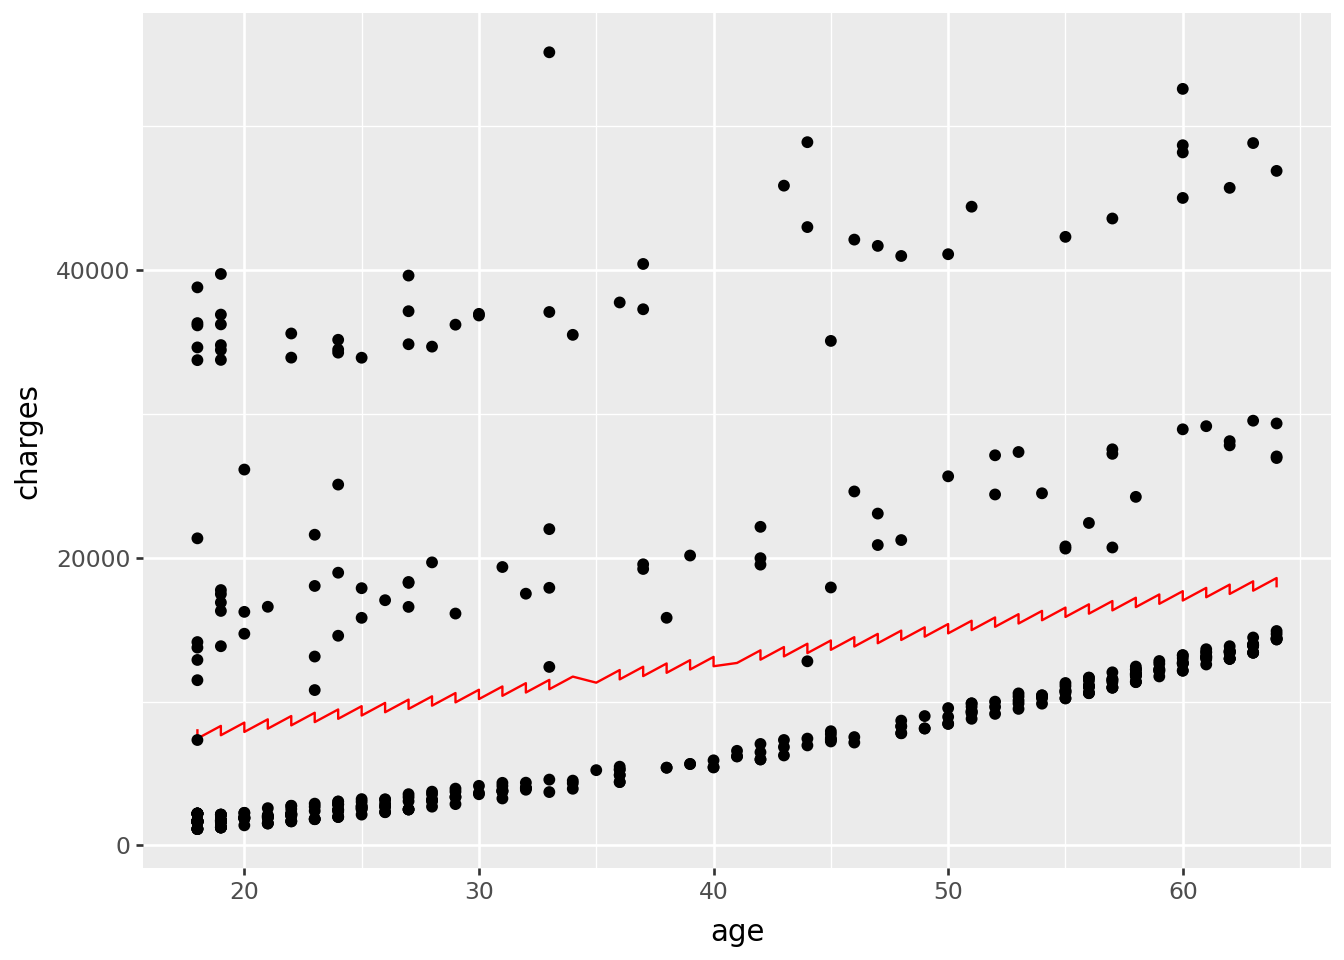

In [11]:
x2_2 = Clean_Health_Data[["age", "sex_female"]]
y2_2 = Clean_Health_Data["charges"]

age_sex_model = LinearRegression().fit(x2_2, y2_2)

Clean_Health_Data["pred_Sex"] = age_sex_model.predict(x2_2)
Clean_Health_Data =  Clean_Health_Data.sort_values(["sex_female", "age"])


print(Clean_Health_Data[["age", "sex_female", "charges", "pred_Sex"]].head())

(p9.ggplot(Clean_Health_Data, p9.aes(
    x = "age", 
    y = "charges"
)) 
+p9.geom_line(Clean_Health_Data, p9.aes("age", "pred_Sex"), color = "red")
+p9.geom_point()
)

### 3. Adding model with smoker rather than sex 

     age  smoker_yes    charges  pred_Smoker
40    18       False  1705.6245  2389.764103
54    18       False  1694.7964  2389.764103
59    18       False  1137.4697  2389.764103
93    18       False  1704.5681  2389.764103
144   18       False  1149.3959  2389.764103


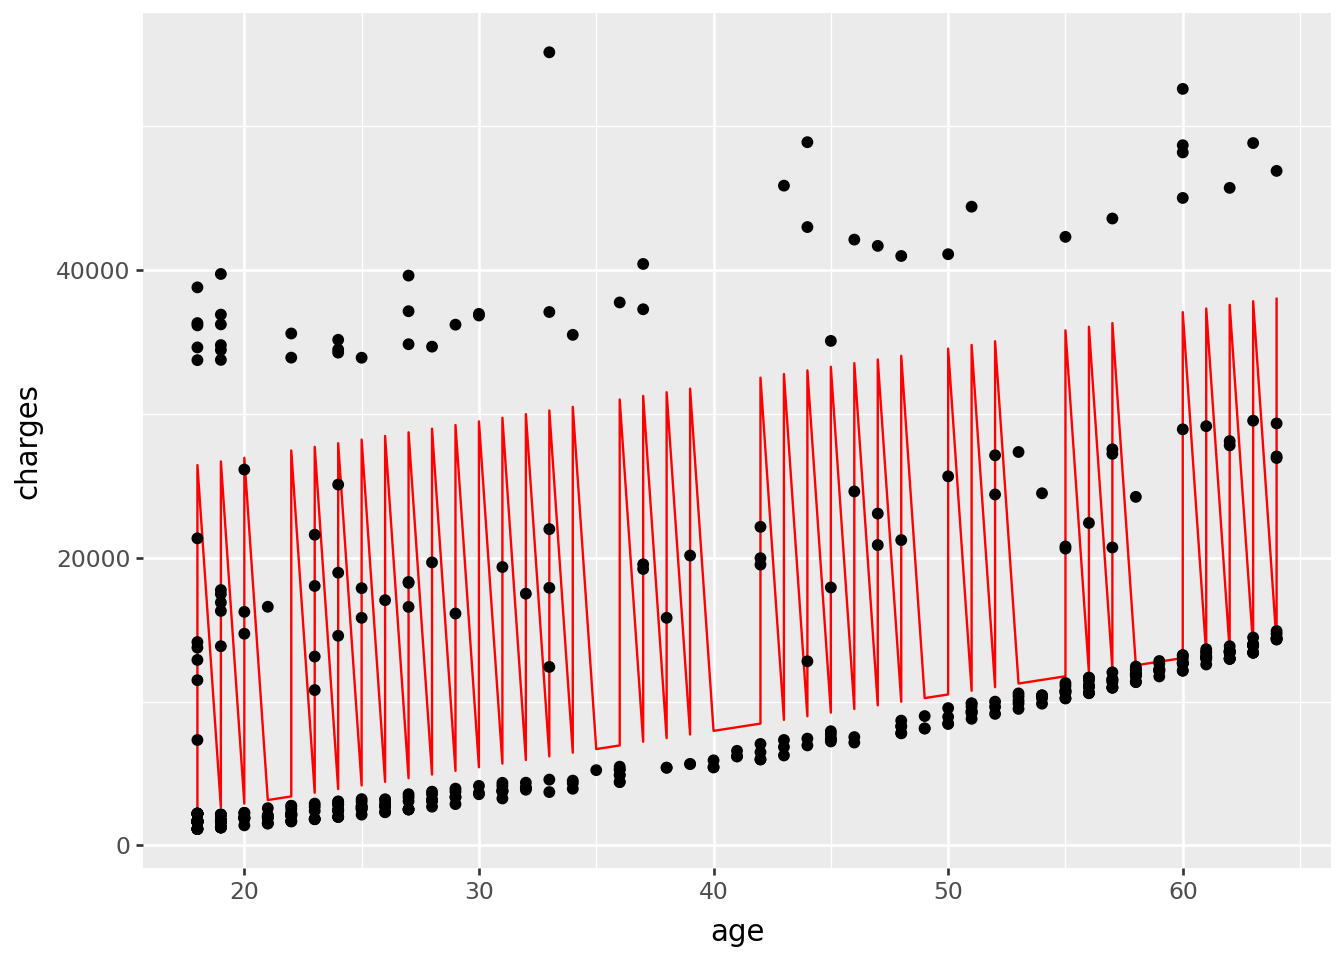

In [12]:
x2_3 = Clean_Health_Data[["age", "smoker_yes"]]
y2_3 = Clean_Health_Data["charges"]

age_smoker_model = LinearRegression().fit(x2_3, y2_3)

Clean_Health_Data["pred_Smoker"] = age_smoker_model.predict(x2_3)
Clean_Health_Data =  Clean_Health_Data.sort_values(["smoker_yes", "age"])

print(Clean_Health_Data[["age", "smoker_yes", "charges", "pred_Smoker"]].head())

(p9.ggplot(Clean_Health_Data, p9.aes(
    x = "age", 
    y = "charges"
)) 
+p9.geom_line(Clean_Health_Data, p9.aes("age", "pred_Smoker"), color = "red")
+p9.geom_point()
)

### 4. Determining the better fitting model using MSE and R-Squared Values

In [13]:
age_sex_MSE = mean_squared_error(y2_2, age_sex_model.predict(x2_2))

age_smoker_MSE = mean_squared_error(y2_3, age_smoker_model.predict(x2_3))

print(age_sex_MSE)
age_smoker_MSE

126633939.67937087


33719831.46524373

In [14]:
age_sex_R = r2_score(y2_2, age_sex_model.predict(x2_2))

age_smoker_R = r2_score(y2_3, age_smoker_model.predict(x2_3))
print(age_sex_R)
age_smoker_R

0.10012952499706396


0.7603842948069404

Based on the comparison of these two model we can see that the age_smoker_model fits the data slightly better than the age_sex_model does. The most difinitve way that we can see this is using the r-squared values which indicate that 76% of the data is represented by the age_smoker_model versus only 10% represented by the age_sex_model. One consideration to make is that we got very high mean squared error values for both of the models, likely due to the sheer number of outlieres and variations that are in the data. 

## Part Three: Multiple Linear Models

### 1. Fitting a model that uses age and bmi as predictors 

In [15]:
x3 = health_data.drop({"charges", "sex", "smoker", "region"}, axis=1)

y3 = health_data["charges"]

x_train, x_test, y_train, y_test = train_test_split(x3,y3, test_size = 0.25)

x_age_bmi_sub = x_train[["age", "bmi"]]

ML_age_bmi = LinearRegression().fit(x_age_bmi_sub, y_train)
Clean_Health_Data["pred_Mult"] = ML_age_bmi.predict(x3)

In [16]:
MSE_age_bmi = mean_squared_error(y_train, ML_age_bmi.predict(x_age_bmi_sub))
print(MSE_age_bmi)
r2_age_bmi = r2_score(y_train ,ML_age_bmi.predict(x_age_bmi_sub))
r2_age_bmi

118961064.15203139


0.1171143934932859

In [17]:
diff_MSE1 = MSE_age_bmi - MSE_base
print("The difference in mean squared errors is supprising as the base model indicates a lower"
"\nerror value with the differece being " + str(diff_MSE1))

The difference in mean squared errors is supprising as the base model indicates a lower
error value with the differece being -7778203.758232489


In [18]:
diff_R1 = r2_age_bmi - R_base
print("observing the differnce in r squared scores we can see that the multiple linear regression"
"\noutperformed the base model with an r squared differnce of " +str(diff_R1))

observing the differnce in r squared scores we can see that the multiple linear regression
outperformed the base model with an r squared differnce of 0.01773333897265883


### 2. Fitting a model using age and age^2

In [19]:
health_data["age_x2"] = health_data["age"] **2

x3_2 = health_data.drop({"charges", "sex", "smoker","bmi", "region"}, axis=1)

x_train, x_test, y_train, y_test = train_test_split(x3_2,y3, test_size = 0.25)

x_age_2 = x_train[["age", "age_x2"]]

ML_age_2 = LinearRegression().fit(x_age_2, y_train)

Clean_Health_Data["pred_age2"] = ML_age_2.predict(x3_2)

In [20]:
MSE_age2 = mean_squared_error(y_train, ML_age_2.predict(x_age_2))
print(MSE_age2)
r2_age2 = r2_score(y_train ,ML_age_2.predict(x_age_2))
r2_age2

125396668.32487969


0.07578674995384749

In [21]:
diff_MSE2 = MSE_age2 - MSE_base
print("although the differnces were slightly lower for Mean Standard Error, their was still a"
"\nhigh error value for the newer model and the base model outperformed the newer by " +str(diff_MSE2))

although the differnces were slightly lower for Mean Standard Error, their was still a
high error value for the newer model and the base model outperformed the newer by -1342599.58538419


In [22]:
diff_R2 = f"{(r2_age2 - R_base): .10f}"
print("looking at this model we can see based on the r squared value is barely better than the base model"
"\nwith a differnce of" +str(diff_R2))

looking at this model we can see based on the r squared value is barely better than the base model
with a differnce of-0.0235943046


### 3. Fitting a polynomial model to the 4th degree 

In [23]:
four_degree_coef = np.polyfit(Clean_Health_Data["age"], Clean_Health_Data["charges"], 4)

Four_model = np.poly1d(four_degree_coef)
Clean_Health_Data["Pred_4th"] = Four_model(Clean_Health_Data["age"])

MSE_4th = mean_squared_error(Clean_Health_Data["charges"], Clean_Health_Data["Pred_4th"])
r2_4th = r2_score(Clean_Health_Data["charges"], Clean_Health_Data["Pred_4th"])

In [24]:
diff_MSE3 = MSE_base - MSE_4th
diff_R3 = r2_4th - R_base
print(diff_MSE3)
diff_R3

1188878.2645655423


0.00844826001121024

### 4. Fitting a polynomial model using 12 degrees 

In [25]:
twelve_degree_coef = np.polyfit(Clean_Health_Data["age"], Clean_Health_Data["charges"], 12)

twelve_model = np.poly1d(twelve_degree_coef)
Clean_Health_Data["Pred_12th"] = twelve_model(Clean_Health_Data["age"])

MSE_12th = mean_squared_error(Clean_Health_Data["charges"], Clean_Health_Data["Pred_12th"])
r2_12th = r2_score(Clean_Health_Data["charges"], Clean_Health_Data["Pred_12th"])

In [26]:
diff_MSE4 = MSE_base - MSE_12th
diff_R4 = r2_12th - R_base
print(diff_MSE4)
diff_R4

2827787.8571110815


0.02009447710960377

### 5. Which is the best model to use according to MSE and R-Squared

In [27]:
MSE_data = {
    "Age_Bmi_MSE": MSE_age_bmi,
    "Age_Squared_MSE": MSE_age2,
    "Fourth_Degree_MSE": MSE_4th,
    "Twelth_Degree_MSE": MSE_12th
}

min(MSE_data, key=MSE_data.get)

'Age_Bmi_MSE'

In [28]:
R_data = {
    "Age_Bmi_R": r2_age_bmi,
    "Age_Squared_R": r2_age2,
    "Fourth_Degree_R": r2_4th,
    "Twelth_Degree_R": r2_12th
}

min(R_data, key=R_data.get)

'Age_Squared_R'

according to the MSE the best model is the twelth degree model however according to the R Sqaured the best model is Age_Squared. i dont agree with these outcomes as when we first displayed the data their are various trends to notice which make it difficult to plot a single line on the graph. If we were plotting two or three lines of best fit this would help boost are MSE and R-squared values to better represent the data. 

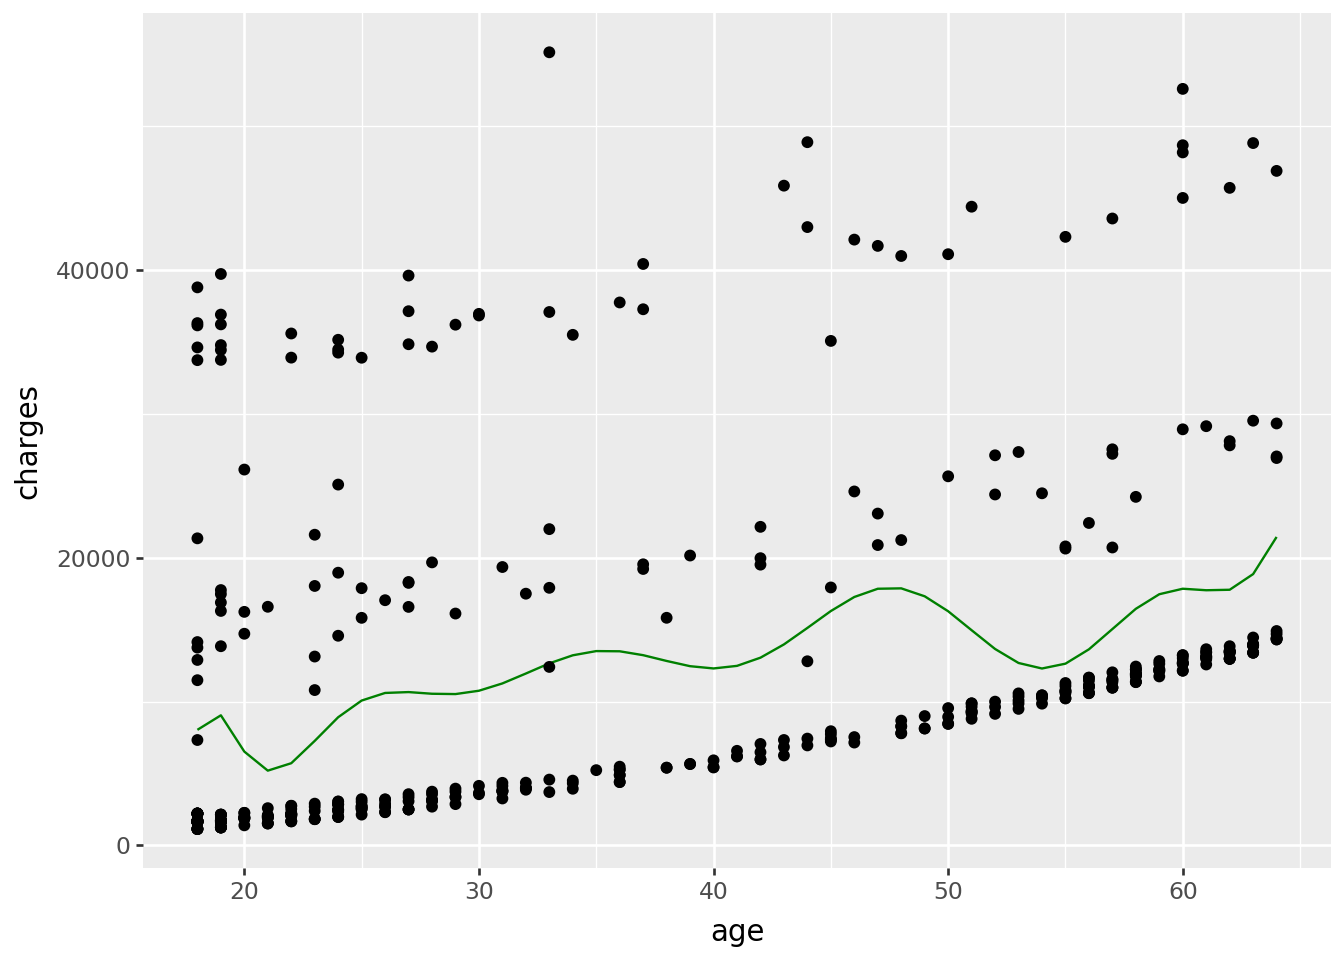

In [29]:
(p9.ggplot(Clean_Health_Data, p9.aes(
    x = "age", 
    y = "charges"))
    
+p9.geom_line(Clean_Health_Data, p9.aes("age", "Pred_12th"), color = "green")
+p9.geom_point()
)

## Part Four: New Data

### 1. Import new dataset 

In [30]:
updated_health =pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

In [31]:
C_health = pd.get_dummies(updated_health)

### 2. Creating a function that workers to take various inputs of training and fitting the linear regressions

In [32]:
x4 = C_health.drop(columns=("charges"))
y4 = C_health["charges"]

x_train = x4         
y_train = y4


def fitting_and_Computing(new_df,y, inter_type, pred_name ,x1, x2 =None,x3= None):

    """
    This Function is used to help compare the two data sets and fit linear regression models 
    with eachother using different methods in order to determine which model contained the 
    best overall fit for the data we provided prior to calling this function. 

    Parameters
    ----------
    new_df: This is the model that we will use to help display our predictions and is the model we 
    will be fitting. it also will be used in the nested function make_feature to help index and align 
    the columns used. 

    y: y is the value that we willbe trying to fit to throughout the linear regression

    inter_type (n/a, two, three): this value is ethier n/a, meaning that we are just using the 
    x values to make predictions and not interacting at all. it can be two which means that we 
    are taking the first two x values and interacting them with the third one. If three is passed 
    we are adding the first two values together and interacting that with the third x value. 

    pred_name: This value is coulmn name that will be stored in the new_df dataframe that we passed
    and will have all of the prediction values stored inside of it

    x1: this will be a column name that we want to perfom linear regression on 

    x2 and x3: these are also column names but are optional on if you wish to pass in an column name to 
    them, this function works regardless if they have an input or not.

    Returns
    -------
    MSE: this is the mean standard error that our linear regression model found.
    r2: this is the R-Squared value that the linear regression model found.
    """
    
    cols = [x1]
    if isinstance(x2, str):
        cols.append(x2)
    if isinstance(x3, str) and inter_type == "n/a":
        cols.append(x3)

    Xtr = x_train[cols].copy()
    ytr = y_train

    if inter_type == "two":

        if not (isinstance(x2,str) and isinstance(x3,str)):
            raise ValueError()
        Xtr[f"{x1}_Smoke"] = x_train[x1] * x_train[x3]
        Xtr[f"{x2}_Smoke"] = x_train[x2] * x_train[x3]
        Xtr = Xtr[[f"{x1}_Smoke", f"{x2}_Smoke"]]
    
    elif inter_type == "three":
        if not (isinstance(x2,str) and isinstance(x3,str)):
            raise ValueError()
        comb = f"{x1}{x2}{x3}_Com"
        Xtr[comb] = (x_train[x1] + x_train[x2]) * x_train[x3]
        Xtr = Xtr[[comb]]        

    Lr = LinearRegression().fit(Xtr,ytr)
    yhat_tr = Lr.predict(Xtr)

    new_df.loc[Xtr.index, pred_name] = yhat_tr

    MSE = mean_squared_error(ytr, yhat_tr)
    r2 = r2_score(ytr, yhat_tr)

    def make_features(df):
        X = pd.DataFrame(index=df.index)
        if inter_type == "n/a":
                X[x1] = df[x1]
                if isinstance(x2, str): X[x2] = df[x2]
                if isinstance(x3, str): X[x3] = df[x3]
        elif inter_type == "two":
                X[f"{x1}_Smoke"] = df[x1] * df[x3]
                X[f"{x2}_Smoke"] = df[x2] * df[x3]
                X = X[[f"{x1}_Smoke", f"{x2}_Smoke"]]
        else: 
                comb = f"{x1}{x2}{x3}_Com"
                X[comb] = (df[x1] + df[x2]) * df[x3]
                X = X[[comb]]
        return X

    Xnew = make_features(new_df).reindex(columns=Xtr.columns, fill_value=0)
    new_df[pred_name] = Lr.predict(Xnew)
    return MSE, r2

### 3. Only age as the predictor

In [33]:
fitting_and_Computing(C_health, "charges", "n/a", "pred_age", "age")

(135675408.50904146, 0.12495611724399824)

### 4. Age and BMI as the predictors 

In [34]:
fitting_and_Computing(C_health, "charges","n/a","pred_age_bmi", "age", "bmi")

(131898602.87106097, 0.1493147737329742)

### 5. Age, BMI, Smoker as predictor variables 

In [35]:
fitting_and_Computing(C_health, "charges","n/a","pred_age_bmi_smoker", "age", "bmi", "smoker_yes")

(33869793.930144854, 0.7815554320825608)

### 6. Age and BMI as quantitative varibales, with smoker as the interaction term

In [36]:
fitting_and_Computing(C_health, "charges","two","pred_inter_smoke", "age", "bmi", "smoker_yes")

(46532910.406443246, 0.6998841643784122)

### 7. Age, BMI, and Smoker as predictors, with an interaction of the Smoker Variable

In [37]:
fitting_and_Computing(C_health, "charges","three","pred_outer_smoke", "age", "bmi", "smoker_yes")

(47899838.610395364, 0.6910681071711459)

The best model based on all of the values above would be the pred_age_bmi_smoker model which used all 3 variables as predictor variables with the lowest MSE and a fairly high R-Squared value of almost .80, indicating the best fit out of all the regressions we ran.  

### 8. Plotting a residual chart 

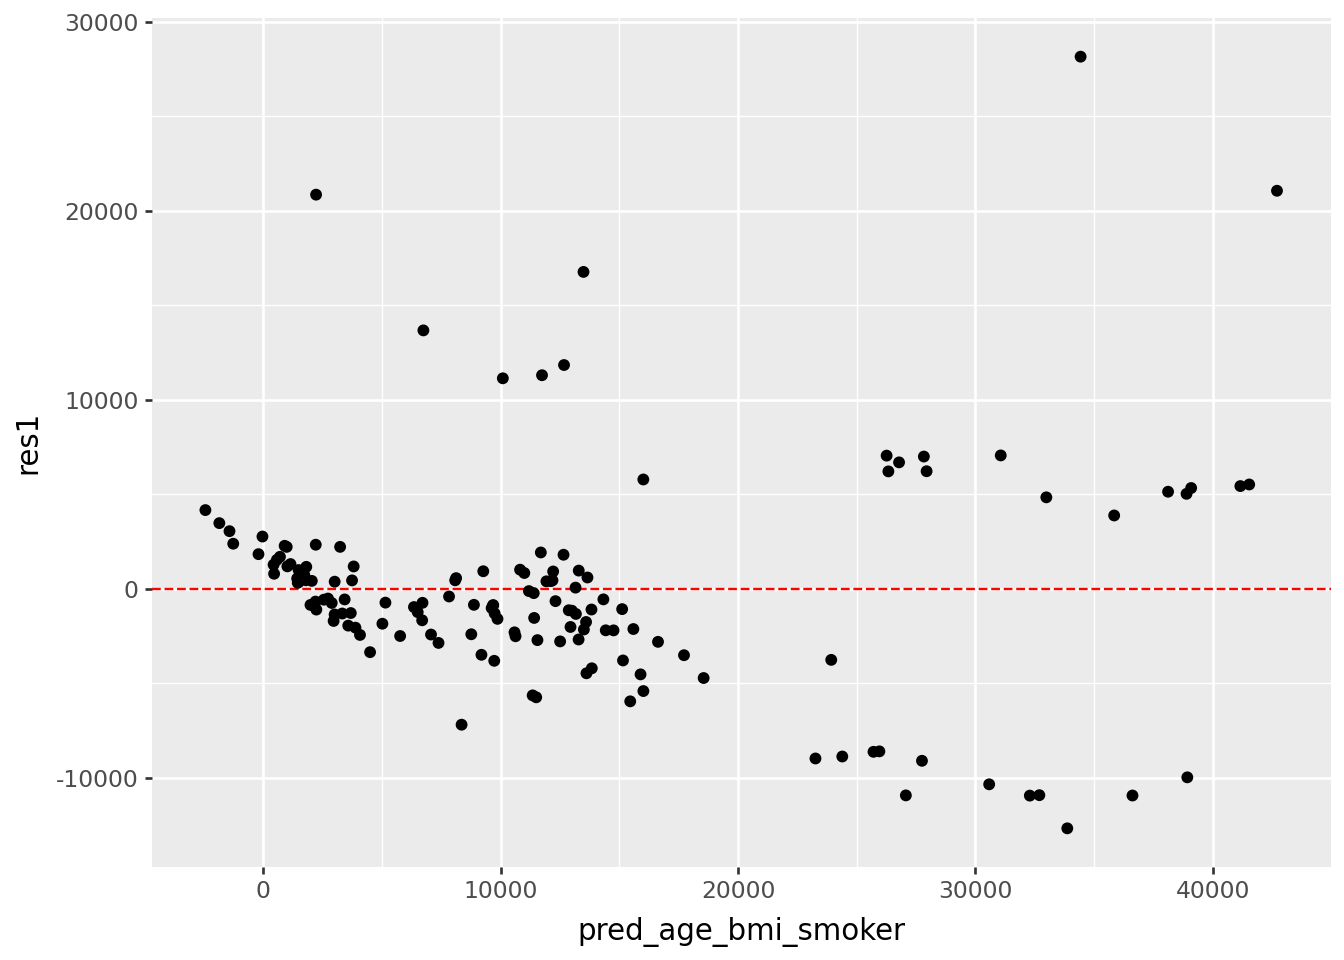

In [38]:
C_health["res1"] = C_health["charges"] - C_health["pred_age_bmi_smoker"]

(p9.ggplot(C_health, p9.aes(
    x= "pred_age_bmi_smoker",
    y= "res1"
))
+p9.geom_hline(yintercept = 0, linetype = "dashed", color = "red")
+p9.geom_point()
)

## Part Five: Full Exploration

In [39]:
Xtr = x_train[["age", "bmi", "smoker_yes", "sex_female", "region_northwest"]]

Final_LR = LinearRegression().fit(Xtr, y_train)
Final_Y = Final_LR.predict(Xtr)

C_health["pred_final"] = Final_Y
C_health["res2"] = C_health["charges"] - C_health["pred_final"]

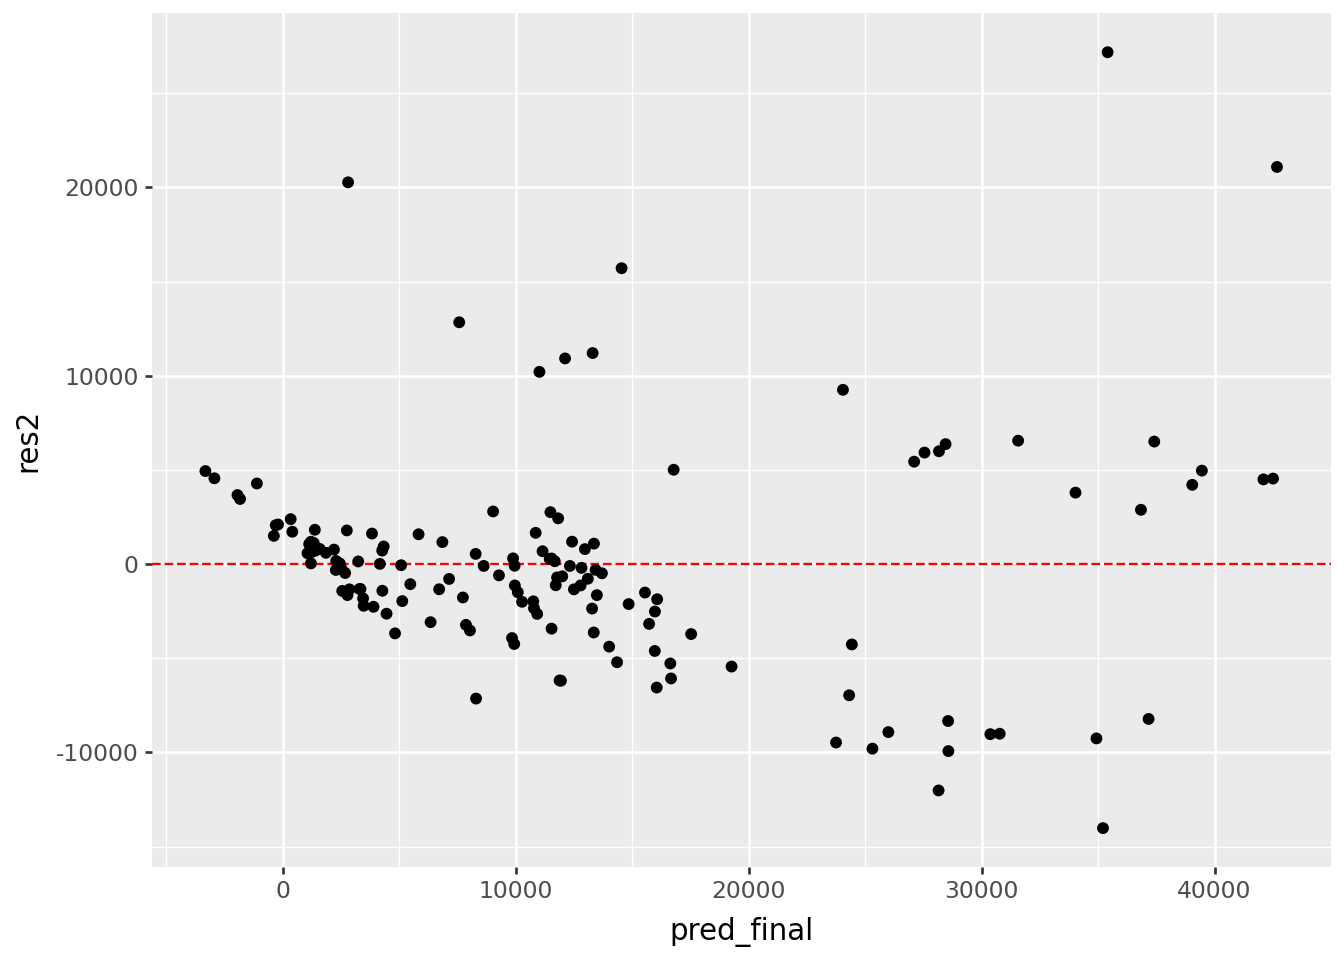

In [40]:
(p9.ggplot(C_health, p9.aes(
    x= "pred_final",
    y= "res2"
))
+p9.geom_hline(yintercept = 0, linetype = "dashed", color = "red")
+p9.geom_point()
)